## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Loading and Splitting the Dataset

In [2]:
# Assuming the functions are defined as provided earlier
# import the necessary regression functions from your code

# Load dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to X_train and X_test for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


## Testing the Linear Regression Codes

In [3]:
import KCV
from implementations import logistic_regression,reg_logistic_regression
KCV = KCV.K_Fold_CV(X_train = X_train, y_train = y_train, k = 10, model_function= reg_logistic_regression)

KCV.train_and_evaluate(gamma = 0.01, max_iters = 1000, lambda_ = 0.01)



### Linear Regression with Gradient Descent

In [ ]:
# Training performance of the least_squares function

print("-------------------Linear Regression w/ Gradient Descent-------------------")
from implementations import mean_squared_error_gd
beta, loss = mean_squared_error_gd(y_train, X_train,initial_w= np.zeros(X_train.shape[1]), max_iters=100, gamma=0.1)
print("Train Loss:", loss[-1])

# Test performance of the least_squares function
y_pred = np.matmul(X_test, beta)
test_loss = 0.5*np.mean((y_test - y_pred)**2)
print("Test loss:", test_loss)

### Linear Regression with Stochastic Gradient Descent

In [ ]:
print("-------------------Logistic Regression w/ Gradient Descent-------------------")
from implementations import logistic_regression
from utils import sigmoid, sigmoid_loss
# Function to compute accuracy (for classification tasks)
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

# Train logistic regression using the function
w_logistic, loss_logistic = logistic_regression(y_train, X_train, initial_w=np.zeros(X_train.shape[1]), max_iters=100, gamma=0.01)

# Print the final training loss
print("Train Loss:", loss_logistic[-1])

# Test performance (cross-entropy loss) of the logistic regression on the test set
test_loss = sigmoid_loss(y_test, X_test, w_logistic)
print("Test Loss:", test_loss)

In [ ]:
# Training performance of the least_squares function
print("-------------------Least Squares-------------------")
from implementations import least_squares
beta, loss = least_squares(y_train, X_train)
print("Train Loss:", loss)

# Test performance of the least_squares function
y_pred = np.matmul(X_test, beta)
test_loss = 0.5*np.mean((y_test - y_pred)**2)
print("Test loss:", test_loss)

### Linear Regression with Ridge Regression 

In [ ]:
# Training performance of the least_squares function
print("-------------------Ridge Regression-------------------")
from implementations import ridge_regression

lambda_ = 0.1
beta, loss = ridge_regression(y_train, X_train,lambda_)
print("Train Loss:", loss)

# Test performance of the least_squares function
y_pred = np.matmul(X_test, beta)
test_loss = 0.5*np.mean((y_test - y_pred)**2)
print("Test loss:", test_loss)

### Logistic Regression

In [ ]:
print("-------------------Logistic Regression w/ Gradient Descent-------------------")
from implementations import logistic_regression
from utils import sigmoid, sigmoid_loss
# Function to compute accuracy (for classification tasks)
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

# Train logistic regression using the function
w_logistic, loss_logistic = logistic_regression(y_train, X_train, initial_w=np.zeros(X_train.shape[1]), max_iters=100, gamma=0.01)

# Print the final training loss
print("Train Loss:", loss_logistic[-1])

# Test performance (cross-entropy loss) of the logistic regression on the test set
test_loss = sigmoid_loss(y_test, X_test, w_logistic)
print("Test Loss:", test_loss)

### Regularized Logistic Regression

In [ ]:
print("-------------------Logistic Regression w/ Gradient Descent-------------------")
from implementations import reg_logistic_regression
from utils import sigmoid, sigmoid_loss
lambda_ = 0.1
# Function to compute accuracy (for classification tasks)
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = correct_predictions / len(y_true)
    return accuracy

# Train logistic regression using the function
w_logistic, loss_logistic = reg_logistic_regression(y_train, X_train,lambda_ = lambda_, initial_w=np.zeros(X_train.shape[1]), max_iters=100, gamma=0.01)

# Print the final training loss
print("Train Loss:", loss_logistic[-1])

# Test performance (cross-entropy loss) of the logistic regression on the test set
test_loss = sigmoid_loss(y_test, X_test, w_logistic)
print("Test Loss:", test_loss)

## Testing K-Fold Cross Validation Code 

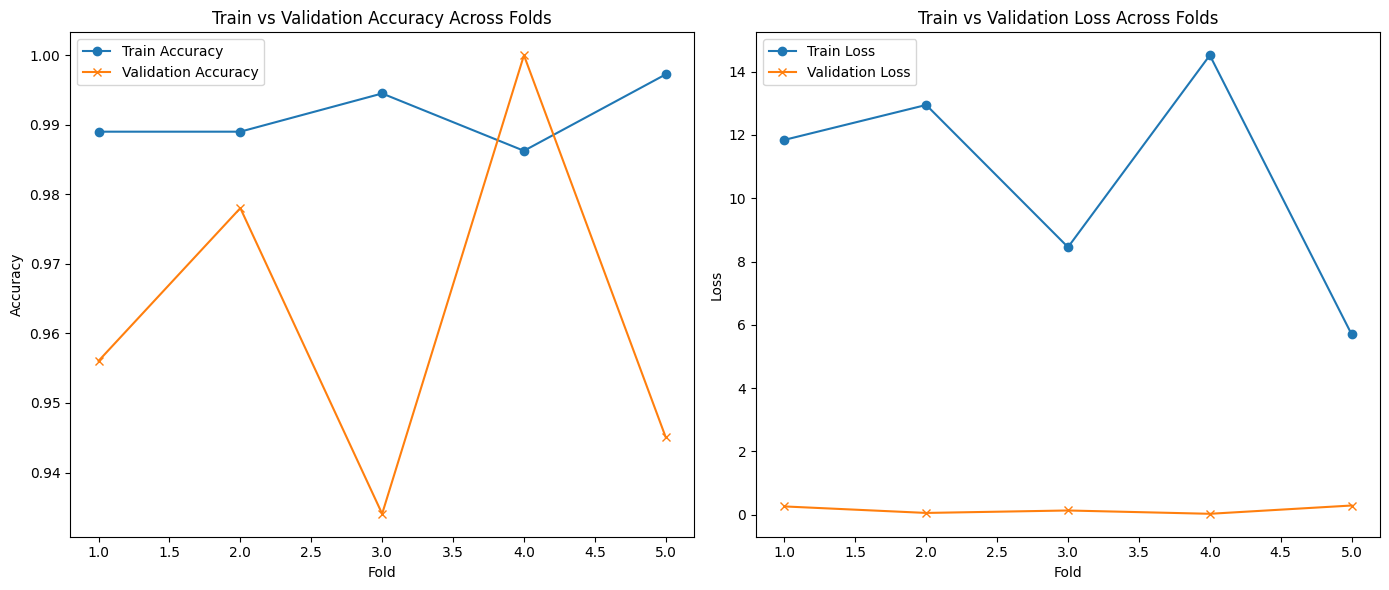

In [7]:
import KCV
from implementations import logistic_regression,reg_logistic_regression
KCV = KCV.K_Fold_CV(X_train = X_train, y_train = y_train, k = 5, model_function= reg_logistic_regression)

KCV.train_and_evaluate(gamma = 0.01, max_iters = 1000, lambda_ = 0.01)

KCV.plot_metrics()

In [ ]:

# Assuming the functions are defined as provided earlier
# import the necessary regression functions from your code

# Load dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.2)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to X_train and X_test for the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize weights
initial_w = np.zeros(X_train.shape[1])

# Parameters
max_iters = 100
gamma = 0.01
lambda_ = 0.1

# Function to compute sigmoid loss on the test set
def compute_test_error_logistic(y, tx, w):
    pred = sigmoid(tx @ w) >= 0.5
    error = np.mean(pred != y)
    return error

# Test Logistic Regression with tracking of test errors
print("\nTesting Logistic Regression:")
w_logistic = initial_w
loss_logistic = np.zeros(max_iters)
test_errors_logistic = np.zeros(max_iters)

for n_iter in range(max_iters):
    gradient = sigmoid_derivative(y_train, X_train, w_logistic)
    w_logistic = w_logistic - gamma * gradient
    loss_logistic[n_iter] = sigmoid_loss(y_train, X_train, w_logistic)
    test_errors_logistic[n_iter] = compute_test_error_logistic(y_test, X_test, w_logistic)

# Test Regularized Logistic Regression with tracking of test errors
print("\nTesting Regularized Logistic Regression:")
w_reg_logistic = initial_w
loss_reg_logistic = np.zeros(max_iters)
test_errors_reg_logistic = np.zeros(max_iters)

for n_iter in range(max_iters):
    gradient = sigmoid_derivative(y_train, X_train, w_reg_logistic) + 2 * lambda_ * w_reg_logistic
    w_reg_logistic = w_reg_logistic - gamma * gradient
    loss_reg_logistic[n_iter] = sigmoid_loss(y_train, X_train, w_reg_logistic) + lambda_ * np.linalg.norm(w_reg_logistic) ** 2
    test_errors_reg_logistic[n_iter] = compute_test_error_logistic(y_test, X_test, w_reg_logistic)

# Plotting the loss curves and test errors
fig, ax1 = plt.subplots(figsize=(10, 6))

# Loss curves
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Training Loss')
ax1.plot(loss_logistic, label='Logistic Regression Loss', color='tab:blue')
ax1.plot(loss_reg_logistic, label='Regularized Logistic Regression Loss', color='tab:orange')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Test errors
ax2 = ax1.twinx()
ax2.set_ylabel('Test Error')
ax2.plot(test_errors_logistic, label='Logistic Regression Test Error', linestyle='--', color='tab:blue')
ax2.plot(test_errors_reg_logistic, label='Regularized Logistic Regression Test Error', linestyle='--', color='tab:orange')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('Loss Curves and Test Error Over Iterations')
plt.show()